In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:
# Initialize the input vector and output vector for XOR
x=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]]) 

In [3]:
#Initialize the structure of  MLP with input ,hidden  and output layer
n_x = 2
n_y = 1
n_h = 2
m = x.shape[1]
lr = 0.1



In [4]:
# Weight matrix for hidden layer randomly
w1 = np.random.rand(n_h, n_x)
w2 = np.random.rand(n_y, n_h)
losses = []

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

In [9]:
def back_prop(m, w1, w2, z1, a1, z2, a2, y, lr):
    dz2 = a2 - y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    dz1 = np.dot(w2.T, dz2) * sigmoid(z1)
    dw1 = (1 / m) * np.dot(dz1, x.T)
    w1 -= lr * dw1
    w2 -= lr * dw2
    return w1, w2


In [10]:
#Train the MLP

def train_mlp(w1, w2, x, y, lr, iterations):
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, w2, x)
        loss = np.mean(np.square(a2 - y))
        losses.append(loss)
        w1, w2 = back_prop(m, w1, w2, z1, a1, z2, a2, y, lr)
    return w1, w2

def predict(w1, w2, input):
    _, _, _, a2 = forward_prop(w1, w2, input)
    return np.round(a2)

# Train the MLP
iterations = 10000
w1, w2 = train_mlp(w1, w2, x, y, lr, iterations)
    



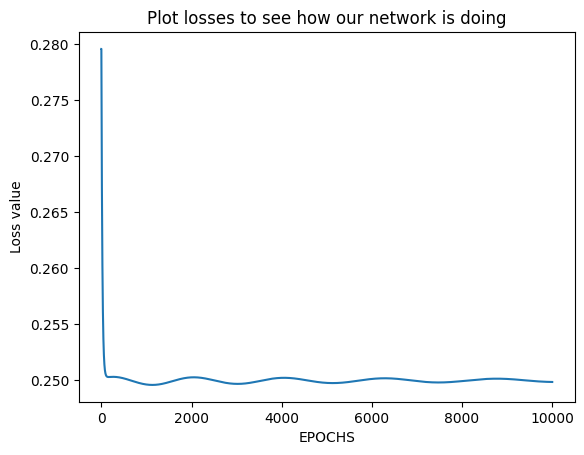

In [13]:
# Plot losses to see how our network is doing
plt.plot(losses)
plt.title("Plot losses to see how our network is doing")
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [12]:

# Test the XOR classification
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for test_input in test_inputs:
    prediction = predict(w1, w2, test_input.reshape(2, 1))
    print(f"Input: {test_input} Predicted Output: {prediction}")

Input: [0 0] Predicted Output: [[1.]]
Input: [0 1] Predicted Output: [[1.]]
Input: [1 0] Predicted Output: [[1.]]
Input: [1 1] Predicted Output: [[1.]]
